In [1]:
import os
import json
import numpy as np
import pandas as pd

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 20, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
british_combo_files = [
    "/data6/deepro/ukb_bmi/2_rarecomb/data/british_male/combo2.csv",
    "/data6/deepro/ukb_bmi/2_rarecomb/data/british_male/combo3.csv"
]
comorbid_combos = [
    ["/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/E10-E14Diabetesmellitus/combo2.csv"],
    ["/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/E70-E90Metabolicdisorders/combo2.csv", "/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/E70-E90Metabolicdisorders/combo3.csv"],
    ["/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/I20-I25Ischaemicheartdiseases/combo2.csv"],
    ["/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/K80-K87Disordersofgallbladder,biliarytractandpancreas/combo2.csv", "/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/K80-K87Disordersofgallbladder,biliarytractandpancreas/combo3.csv"],
    ["/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/M15-M19Arthrosis/combo2.csv", "/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/M15-M19Arthrosis/combo3.csv"]
    ]


In [4]:
combo_df = pd.read_csv(british_combo_files[0])

In [5]:
def create_combo_df(combo_files, ftype):
    combo_df = pd.concat([pd.read_csv(cf) for cf in combo_files])
    combo_df["category"] = ftype
    return combo_df.loc[:, ["uniq_items", "category"]]
    

In [6]:
bdf = pd.concat([create_combo_df(cfs, cftype) for cfs, cftype in zip([british_combo_files] + comorbid_combos, ["BMI", "Diabetes", "Metabolic Disorder", "Ischaemic heart diseases", "Disorders of gall bladder, biliary tract and pancreas", "Arthrosis"])])


FileNotFoundError: [Errno 2] No such file or directory: '/data6/deepro/ukb_bmi/2_rarecomb/data/comorbidities/E10-E14Diabetesmellitus/combo2.csv'

In [ ]:
bdf = pd.get_dummies(bdf, columns=["category"], prefix="", prefix_sep="")

In [ ]:
bdf = bdf.groupby("uniq_items").aggregate(lambda x: sum(x))

In [ ]:
bdf = bdf.loc[(bdf.sum(axis=1)>1)&(bdf.BMI==1)]

In [ ]:
gene_df = bdf.reset_index().uniq_items.str.replace("Input_", "").str.split("|", expand=True)

In [ ]:
gene_df = pd.get_dummies(gene_df, prefix="", prefix_sep="").astype(int)

In [ ]:
icd_df = bdf.reset_index(drop=True)

In [ ]:
icd_df

,Arthrosis,BMI,Diabetes,"Disorders of gall bladder, biliary tract and pancreas",Ischaemic heart diseases,Metabolic Disorder
0,0,1,0,0,0,1
1,0,1,1,0,0,0
2,0,1,0,0,0,1
3,0,1,0,0,1,0
4,1,1,0,0,0,0
5,0,1,0,0,1,0
6,0,1,0,0,0,1
7,1,1,0,0,0,0
8,1,1,0,0,0,0


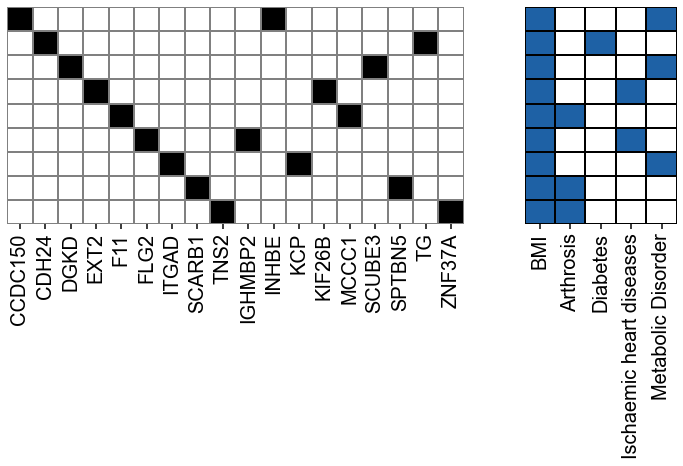

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 4), gridspec_kw={'width_ratios': [len(gene_df.columns), len(icd_df.columns)]})
g1 = sns.heatmap(
    data=gene_df, 
    linewidths=1.5,
    linecolor="grey", 
    cbar=False,
    cmap=["w", "k"], # "w", "#ab162a" 
    ax=ax[0],
    yticklabels=False,
    square=False,
    )
g2 = sns.heatmap(
    data=icd_df.loc[:, ["BMI", "Arthrosis", "Diabetes", "Ischaemic heart diseases", "Metabolic Disorder"]], 
    linewidths=1.5,
    linecolor="k", 
    cbar=False,
    cmap=["w", "#1e61a5"], # "w", "#ab162a"
    ax=ax[1],
    yticklabels=False,
    square=False,
    )


In [ ]:
save_file = "/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/comorbidities/icd_profile.pdf"
save_pdf(save_file, fig)